# ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ - ΕΡΓΑΣΙΑ 1

### ΕΥΘΥΜΙΟΣ ΓΡΗΓΟΡΑΚΗΣ - ΑΕΜ: 9694
### ΑΝΕΣΤΗΣ ΚΑΪΜΑΚΑΜΙΔΗΣ - ΑΕΜ: 9627

In [14]:
!pip install numpy 
!pip install matplotlib
!pip install scipy

You should consider upgrading via the 'c:\users\thegr\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\thegr\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\thegr\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [15]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import integrate, optimize

# ΜΕΡΟΣ Α 

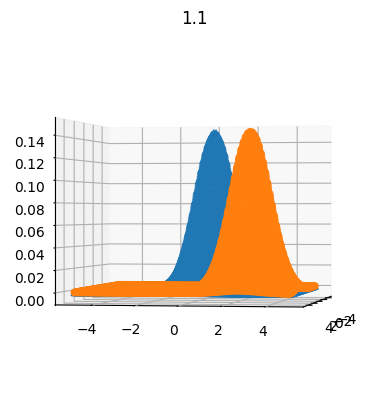

In [16]:
# mean values for each class
mean1 = np.array([0.4,0.8])
mean2 = np.array([1.5,2.7])

# covariance matrix (same for each class)
Sigma = np.array([[1.5, 0],
                  [0, 0.8]])

# a-priori probabilities
P1 = 0.95
P2 = 0.05

# number of points for each feature
points = 100

#create points between -5 and 5 for each feature 
x1 = np.linspace(-5,5,num = points)
x2 = np.linspace(-5,5,num = points)
        
#x12v = np.linspace([-3,-4],[3,4],num = points)

# create the 2-d grid
xx,yy = np.meshgrid(x1,x2)
x12 = np.array((xx.ravel(), yy.ravel())).T

# points for plotting
x1plot = x12[:,0]
x2plot = x12[:,1]

# p1 -> p(x|ω1) p2 -> p(x|ω2)
p1 = np.zeros(points * points)
p2 = np.zeros(points * points)
    
# compute probabilities with 2-d gaussian distribution
for i in range(points * points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))


fig = plt.figure()
# scatter plot of the above two probilities
axes = plt.axes(projection ='3d')
axes.scatter(x1plot, x2plot, p1, marker = '^')
axes.scatter(x1plot, x2plot, p2, marker = 'o')
axes.view_init(0,10)

plt.title("1.1")
plt.show() 

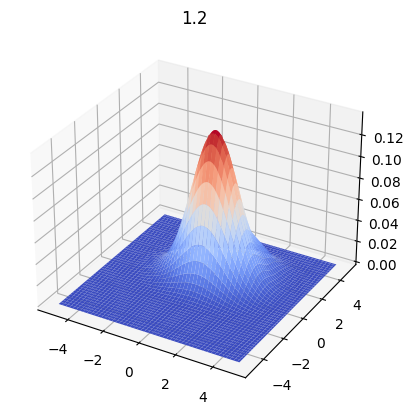

In [17]:
# px -> p(x)
px = np.zeros(points * points)


for i in range(points * points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()

# reshaping so we can plot px
px = np.reshape(px,(points,points))

axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,px,cmap=cm.coolwarm)
# change the view of the plot 
# axes.view_init(25, 45)

plt.title("1.2")
plt.show()

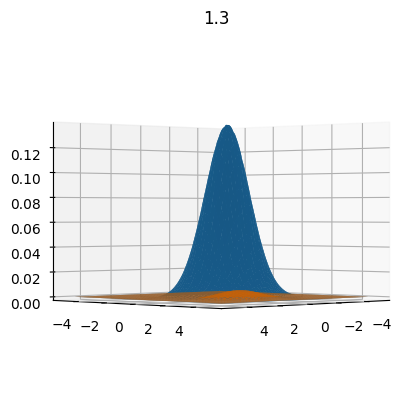

In [18]:

# P1x -> P(ω1|x) P2x -> P(ω2|x)
P1x = np.zeros(points * points)
P2x = np.zeros(points * points)

for i in range(points * points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2 - np.log(2*np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2 - np.log(2*np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P2)
    
fig = plt.figure()

# reshape for plotting 
P1x = np.reshape(P1x,(points,points))
P2x = np.reshape(P2x,(points,points))

axes = plt.axes(projection = '3d')

axes.plot_surface(xx,yy,np.exp(P1x))
axes.plot_surface(xx,yy,np.exp(P2x))

# change  view of the plot 
axes.view_init(0, 45)
plt.title("1.3")
plt.show()

In [19]:
error1 = 0
error2 = 0
p1 = p1.reshape((points, points))
p2 = p2.reshape((points, points))
px = px.reshape((points, points))

# size of each block
size = x1[1] - x1[0]

# finding where each surface is above the other
for i in range(points):
    for j in range(points):
        if(P1x[i,j] > P2x[i,j]):
            error2 += p2[i,j] * size**2 * P2
        elif(P2x[i,j] > P1x[i,j]):
            error1 += p1[i,j] * size**2 * P1
            

print(error1, error2)
print(error1+error2)

0.007201191385157958 0.027407549105377925
0.03460874049053588


# ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ - ΜΕΡΟΣ Α 

#### Το error που πρέβλεψης της δεύτερης κλάσης είναι μεγαλύτερο από το error πρόβλεψης της πρώτης, το οποίο δεν είναι επιθυμητό στην συγκεκριμένη εφαρμογή, αφού κατηγοριοποιούμε πιο πολλές φορές άρρωστο ασθενή ως υγιή. Όπως φαίνεται στο σχήμα 1.3 αποφασίζουμε πιο πολλές φορές κλάση 1 και για αυτό έχουμε το πιο μεγάλο error στην κλάση 2. Επειδή σε αυτή την εφαρμογή μας ενδιαφέρει περισσότερο η σωστή κατηγοριοποίηση της κλάσης 2, θα μπορούσαμε να αλλάξουμε τα loss functions, το οποίο θα είχε ως αποτέλεσμα την αύξηση του γενικού σφάλματος αλλά και την μείωση της λανθασμένης κατηγοριοποίησης της κλάσης 2. 

# ΜΕΡΟΣ Β 

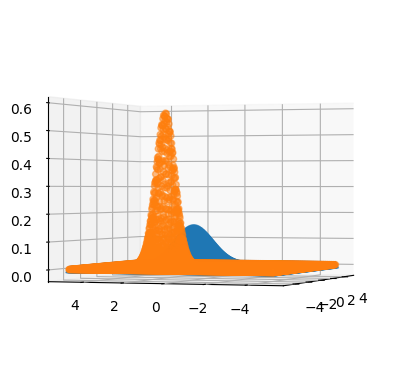

In [20]:
# different covariance matrices 
Sigma1 = Sigma
Sigma2 = Sigma/4

# number of points for each feature
points = 100

# p1 -> p(x|ω1) p2 -> p(x|ω2)
p1 = np.zeros(points*points)
p2 = np.zeros(points*points)

# compute probabilities with 2-d gaussian distribution    
for i in range(points*points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma1)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma2)))

fig = plt.figure()
# scatter plot of the above two probilities
axes = plt.axes(projection ='3d')
axes.scatter(x1plot, x2plot, p1, marker = '^')
axes.scatter(x1plot, x2plot, p2, marker = 'o')
axes.view_init(0, 200)

plt.show() 

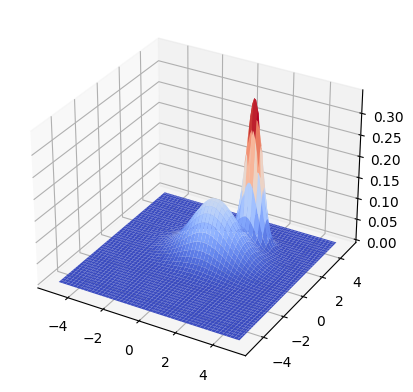

In [21]:
# px -> p(x)
px = np.zeros(points * points)

for i in range(points * points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()
# reshaping so we can plot px
px = np.reshape(px,(points,points))
axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,px,cmap=cm.coolwarm)

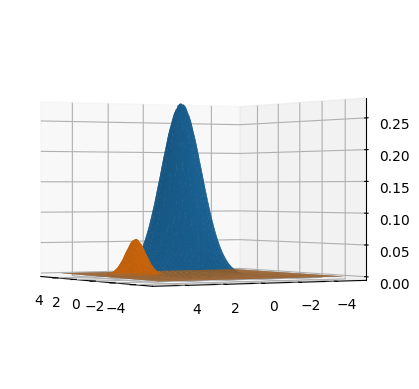

In [22]:
# P1x -> P(ω1|x) P2x -> P(ω2|x)
P1x = np.zeros(points*points)
P2x = np.zeros(points*points)

for i in range(points*points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma1))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma2))/2 + np.log(P2)
    
fig = plt.figure()
# reshape for plotting 
P1x = P1x.reshape((points, points))
P2x = P2x.reshape((points, points))

axes = plt.axes(projection = '3d')
axes.plot_surface(xx,yy,np.exp(P1x))
axes.plot_surface(xx,yy,np.exp(P2x))
# change  view of the plot 
axes.view_init(0,150)
plt.show()

In [23]:
error1 = 0
error2 = 0
p1 = p1.reshape((points, points))
p2 = p2.reshape((points, points))
px = px.reshape((points, points))
# size of each block
size = x1[1] - x1[0]

# finding where each surface is above the other
for i in range(points):
    for j in range(points):
        if(P1x[i,j] > P2x[i,j]):
            error2 += p2[i,j] * size**2 * P2 
        elif(P2x[i,j] > P1x[i,j]):
            error1 += p1[i,j] * size**2 * P1


print(error1, error2)
print(error1+error2)

0.013297606197415017 0.015718367683429484
0.029015973880844502


# ΣΧΟΛΙΑΣΜΟΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ - ΜΕΡΟΣ 2 

#### Στο μέρος Β, εξαιτίας της μείωσης του $Σ_{2}$, η επικάλυψη των κατανομών των δυο κλάσεων μειώνεται, άρα μειώνεται και το γενικό σφάλμα.